# LICENSE

The program animate trigonometric function with respect to unit circle. Original source taken from http://matplotlib.org/gallery.html and modified for the particular purpose.

Copyright (C) 2015  CagriMetin

This program is free software: you can redistribute it and/or modify
it under the terms of the GNU General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This program is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
GNU General Public License for more details.

You should have received a copy of the GNU General Public License
along with this program.  If not, see <http://www.gnu.org/licenses/>.

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


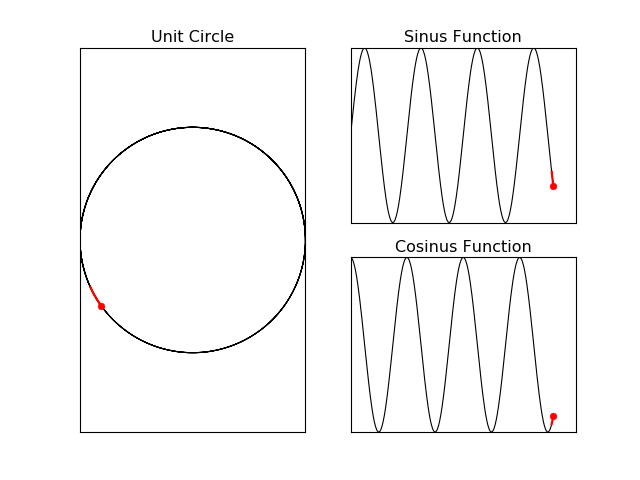

In [4]:
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)

        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(np.pi * self.t / 10.)
        self.y = np.sin(np.pi * self.t / 10.)
        self.z = 10 * self.t * np.pi

        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')
        ax1.get_xaxis().set_visible(False)
        ax1.get_yaxis().set_visible(False)
        ax1.set_title('Unit Circle')

        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_ylim(-1, 1)
        ax2.set_xlim(0, 800*np.pi)
        ax2.get_xaxis().set_visible(False)
        ax2.get_yaxis().set_visible(False)
        ax2.set_title('Sinus Function')

        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D(
            [], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_ylim(-1, 1)
        ax3.set_xlim(0, 800*np.pi)
        ax3.get_xaxis().set_visible(False)
        ax3.get_yaxis().set_visible(False)
        ax3.set_title('Cosinus Function')

        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

    def _draw_frame(self, framedata):
        i = framedata
        head = i - 1
        head_len = 10
        head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])

        self.line1.set_data(self.x[:i], self.y[:i])
        self.line1a.set_data(self.x[head_slice], self.y[head_slice])
        self.line1e.set_data(self.x[head], self.y[head])

        self.line2.set_data(self.z[:i], self.y[:i])
        self.line2a.set_data(self.z[head_slice], self.y[head_slice])
        self.line2e.set_data(self.z[head], self.y[head],)


        self.line3.set_data(self.z[:i], self.x[:i])
        self.line3a.set_data(self.z[head_slice], self.x[head_slice],)
        self.line3e.set_data(self.z[head], self.x[head])

        self._drawn_artists = [self.line1, self.line1a, self.line1e,
                               self.line2, self.line2a, self.line2e,
                               self.line3, self.line3a, self.line3e]

    def new_frame_seq(self):
        return iter(range(self.t.size))

    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,
                 self.line2, self.line2a, self.line2e,
                 self.line3, self.line3a, self.line3e]
        for l in lines:
            l.set_data([], [])

ani = SubplotAnimation()
#ani.save('test_sub.mp4')
plt.show()